# Revision

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import *
import scikitplot as skplt

In [2]:
# read file
data=pd.read_csv("MARKETING_FINANCE_Bank_targeting_default.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp_var_rate    4119 non-null   float64
 16  cons_price_idx  4119 non-null   float64
 17  cons_conf_idx   4119 non-null   f

In [4]:
data.shape

(4119, 21)

In [5]:
#checking number of duplicates, missing values and single valued columns
print("Duplicates:", data.duplicated().sum())
print("Missing values:", data.isna().sum().sum())
print("Single valued columns:", data.columns[data.nunique()==1])

Duplicates: 0
Missing values: 0
Single valued columns: Index([], dtype='object')


- if dulicates: data = data.drop_dupdlicates()
- if NAs: data. data = data.dropna() or data[col_name] = data[col_name].fillna(0) #0 is an example
- if single valued: data = data.drop(['age'], axis=1) #age is an example

In [6]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,30,blue_collar,married,basic_9y,no,yes,no,cellular,may,fri,...,2,0,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,0
1,39,services,single,high_school,no,no,no,telephone,may,fri,...,4,0,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,0
2,25,services,married,high_school,no,yes,no,telephone,jun,wed,...,1,0,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,0
3,38,services,married,basic_9y,no,unknown,unknown,telephone,jun,fri,...,3,0,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,0
4,47,admin_,married,university_degree,no,yes,no,cellular,nov,mon,...,1,0,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,0


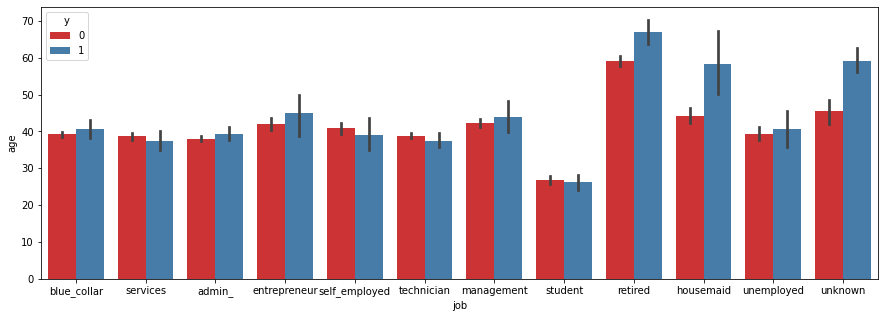

In [7]:
# plot the average age per job depending on the contact type
plt.figure(figsize=(15,5))
sns.barplot(x="job", y="age", hue="y", data=data, palette="Set1")
plt.show()

In [8]:
# check the plot output
data[data['contact']=='cellular'].groupby(by = 'job')['age'].mean()

job
admin_           37.964639
blue_collar      39.599182
entrepreneur     41.294118
housemaid        44.815385
management       42.223176
retired          62.221311
self_employed    41.633663
services         38.564854
student          25.827586
technician       37.605206
unemployed       39.408451
unknown          48.190476
Name: age, dtype: float64

In [9]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,30,blue_collar,married,basic_9y,no,yes,no,cellular,may,fri,...,2,0,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,0
1,39,services,single,high_school,no,no,no,telephone,may,fri,...,4,0,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,0
2,25,services,married,high_school,no,yes,no,telephone,jun,wed,...,1,0,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,0
3,38,services,married,basic_9y,no,unknown,unknown,telephone,jun,fri,...,3,0,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,0
4,47,admin_,married,university_degree,no,yes,no,cellular,nov,mon,...,1,0,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,0


In [10]:
data['month'] = np.where(data['month']=='may',5,np.where(data['month']=='jun',6,np.where(data['month']=='nov',11,
                np.where(data['month']=='sep',9,np.where(data['month']=='jul',7,np.where(data['month']=='aug',8,
                np.where(data['month']=='mar',3,np.where(data['month']=='oct',10,
                np.where(data['month']=='apr',4,12)))))))))

In [11]:
data['season'] = np.where(((data['month']<3)|(data['month']==12)),'winter',np.where(data['month']<6,'spring',
                                                                np.where(data['month']<9,'summer','fall')))

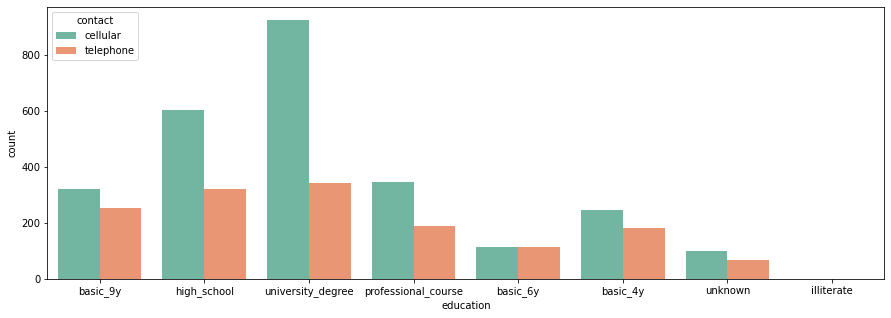

In [12]:
# plot the number of values per job type depending on the contact type
plt.figure(figsize=(15,5))
sns.countplot(x="education", hue="contact", data=data, palette="Set2")

In [13]:
# check the graph output
data[data['contact']=='cellular']['education'].value_counts()

university_degree      923
high_school            602
professional_course    346
basic_9y               321
basic_4y               247
basic_6y               114
unknown                 98
illiterate               1
Name: education, dtype: int64

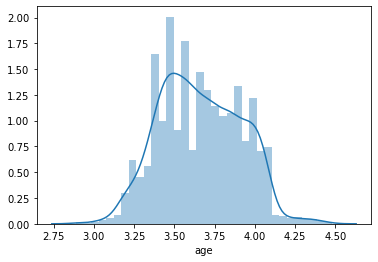

In [14]:
sns.distplot(np.log(data['age']))

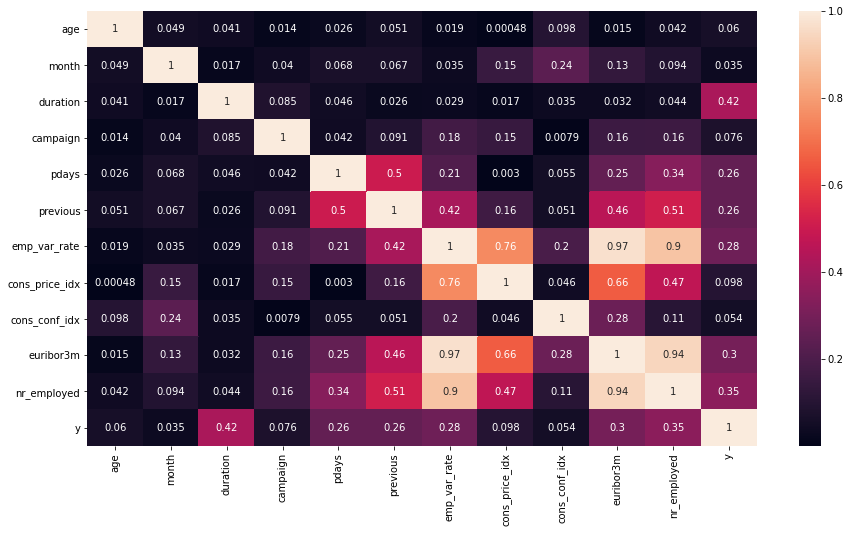

In [15]:
#plot correlation heatmap
# use data.corr().abs() for creating table of correlations instead of just a heatmap
plt.figure(figsize=(15,8))
sns.heatmap(data.corr().abs(), annot=True)
plt.show()

In [16]:
# remove highlt correlated features, usually the features which have correlation higher than 0.9
data = data.drop(['euribor3m'], axis=1)

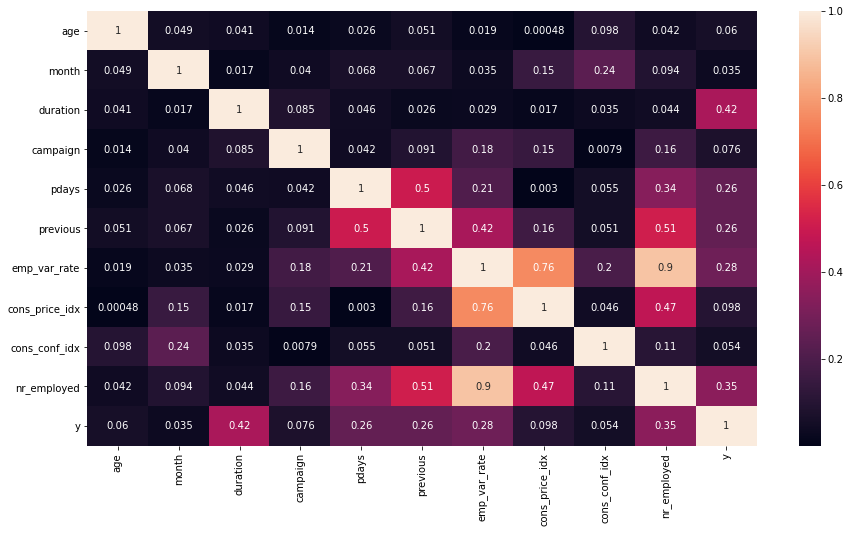

In [17]:
# again check the correlation heatmap and if any correlated features remove one of them as well
plt.figure(figsize=(15,8))
sns.heatmap(data.corr().abs(), annot=True)
plt.show()

In [18]:
# remove highlt correlated features, usually the features which have correlation higher than 0.9
data = data.drop(['nr_employed'], axis=1)

In [19]:
#separating X and Y
Y=data["y"]
X=data.drop("y",axis=1)

#making dummes,train test split
X=pd.get_dummies(X, drop_first=True)

In [20]:
# separate into train and test data sets
X0, X1, Y0, Y1 = train_test_split(X, Y, test_size=0.25, random_state=42)

In [21]:
# we need to scale the data for logistic regression
scaler = StandardScaler()
scaler.fit(X0)
X0_scaled = pd.DataFrame(scaler.transform(X0), columns=X0.columns)
X1_scaled = pd.DataFrame(scaler.transform(X1), columns=X1.columns)

## LogisticRegression

In [22]:
# initial logistic regression
logit=LogisticRegression(C=0.003, class_weight=None, random_state=42).fit(X0_scaled,Y0)

In [23]:
#getting probabilities
Y0_logit=logit.predict_proba(X0_scaled)[:,1]
Y1_logit=logit.predict_proba(X1_scaled)[:,1]

In [24]:
#calculating roc auc score 
print("ROC_AUC Train:",roc_auc_score(Y0,Y0_logit))
print("ROC_AUC Test:",roc_auc_score(Y1,Y1_logit))

ROC_AUC Train: 0.9248260196663239
ROC_AUC Test: 0.9080476944685175


In [25]:
# grid search
param_logit={'class_weight':[None,'balanced'],'C': np.linspace(0.001, 0.1,10)}
gs_logit=GridSearchCV(estimator=LogisticRegression(random_state=42), param_grid=param_logit,
                      scoring="roc_auc", cv=5, verbose=1).fit(X0_scaled,Y0)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    4.4s finished


In [26]:
best_params_logit = gs_logit.best_params_
best_params_logit

{'C': 0.045000000000000005, 'class_weight': 'balanced'}

In [27]:
#fitting logit with best params of gridsearch
logit_grid=LogisticRegression(C=best_params_logit['C'], class_weight=best_params_logit['class_weight'],
                              random_state=42).fit(X0_scaled,Y0)

#predict probabilities
Y0_logit=logit_grid.predict_proba(X0_scaled)[:,1]
Y1_logit=logit_grid.predict_proba(X1_scaled)[:,1]

#transform to binary prediction
Y0_logit_bin=np.where(Y0_logit>0.5,1,0) # logit_grid.predict(X0_scaled)
Y1_logit_bin=np.where(Y1_logit>0.5,1,0)

In [28]:
#calculating roc auc score 
print("ROC_AUC Train:",roc_auc_score(Y0, Y0_logit))
print("ROC_AUC Test:",roc_auc_score(Y1, Y1_logit))
print("Recall Train:",recall_score(Y0, Y0_logit_bin))
print("Recall Test:",recall_score(Y1, Y1_logit_bin))
print("Accuracy Train:",accuracy_score(Y0, Y0_logit_bin))
print("Accuracy Test:",accuracy_score(Y1, Y1_logit_bin))

ROC_AUC Train: 0.9436993466556818
ROC_AUC Test: 0.9141041349151799
Recall Train: 0.8947368421052632
Recall Test: 0.8073394495412844
Accuracy Train: 0.871479443185497
Accuracy Test: 0.8436893203883495


## DecisionTreeClassifier

In [29]:
dt1=DecisionTreeClassifier(random_state=42, max_depth=10, min_samples_leaf=200).fit(X0,Y0)

In [30]:
#getting probabilities
Y0_dt_grid=dt1.predict_proba(X0)[:,1]
Y1_dt_grid=dt1.predict_proba(X1)[:,1]

In [31]:
#calculating roc auc score 
print("ROC_AUC Train:",roc_auc_score(Y0, Y0_dt_grid))
print("ROC_AUC Test:",roc_auc_score(Y1, Y1_dt_grid))

ROC_AUC Train: 0.913174819100901
ROC_AUC Test: 0.8870443972945243


In [32]:
#setting up the ranges for hyperparameters
param_dt={"max_depth":range(2,5),"min_samples_leaf":range(10,100,10),"class_weight":["balanced", None]}

In [33]:
#Cross-Validated Gridsearch
gs_dt=GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), param_grid=param_dt, 
                   scoring="roc_auc", cv=5, n_jobs=-1)
gs_dt.fit(X0,Y0)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'class_weight': ['balanced', None],
                         'max_depth': range(2, 5),
                         'min_samples_leaf': range(10, 100, 10)},
             scoring='roc_auc')

In [34]:
#let's see the optimal parameters
best_params = gs_dt.best_params_
best_params

{'class_weight': 'balanced', 'max_depth': 4, 'min_samples_leaf': 70}

In [36]:
dt1=DecisionTreeClassifier(random_state=42, class_weight=best_params['class_weight'], 
                    max_depth=best_params['max_depth'], min_samples_leaf=best_params['min_samples_leaf']).fit(X0,Y0)

In [37]:
#getting probabilities
Y0_dt_grid=dt1.predict_proba(X0)[:,1]
Y1_dt_grid=dt1.predict_proba(X1)[:,1]
#transform to binary prediction
Y0_dt_grid_bin=np.where(Y0_dt_grid>0.5,1,0)
Y1_dt_grid_bin=np.where(Y1_dt_grid>0.5,1,0)

In [38]:
#calculating roc auc score 
print("ROC_AUC Train:",roc_auc_score(Y0, Y0_dt_grid))
print("ROC_AUC Test:",roc_auc_score(Y1, Y1_dt_grid))
print("Recall Train:",recall_score(Y0, Y0_dt_grid_bin))
print("Recall Test:",recall_score(Y1, Y1_dt_grid_bin))
print("Accuracy Train:",accuracy_score(Y0, Y0_dt_grid_bin))
print("Accuracy Test:",accuracy_score(Y1, Y1_dt_grid_bin))

ROC_AUC Train: 0.9327586500531148
ROC_AUC Test: 0.9120471366384764
Recall Train: 0.8888888888888888
Recall Test: 0.8165137614678899
Accuracy Train: 0.8565878925218517
Accuracy Test: 0.8339805825242719


We choose logistic model as the best one, because it has less overfitting and the same test roc-auc score.